In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
leaky_relu = nn.LeakyReLU(negative_slope=0.01)

# 定义模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 8)  # 输入层到隐藏层
        self.fc2 = nn.Linear(8, 8)  # 隐藏层到隐藏层
        self.fc3 = nn.Linear(8, 4)  # 隐藏层到隐藏层
        self.fc4 = nn.Linear(4, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = leaky_relu(self.fc1(x))  # 隐藏层激活
        x = leaky_relu(self.fc2(x))  # 隐藏层激活
        x = leaky_relu(self.fc3(x))  # 隐藏层激活
        x = self.fc4(x)  # 输出层
        return x

# 创建模型实例
model = SimpleNN()

# 定义损失函数
criterion = nn.MSELoss()

# 定义优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# 读取数据集
data = np.loadtxt("sine_with_noise.txt")
# 保留三位小数
data = np.around(data, decimals=3)
# 对数据集进行随机分割
np.random.shuffle(data)

# 将训练集的第一列和第二列变成新的数据集
data_x = np.array([row[0] for row in data]).reshape(-1, 1)
data_y = np.array([row[1] for row in data]).reshape(-1, 1)

print(data_x)
print(data_y)

[[ 6.551]
 [ 7.462]
 [ 3.949]
 ...
 [ 1.706]
 [11.609]
 [ 0.632]]
[[ 0.205]
 [ 0.977]
 [-0.807]
 ...
 [ 0.882]
 [-0.838]
 [ 0.64 ]]


Epoch [100/1000], Loss: 0.0315


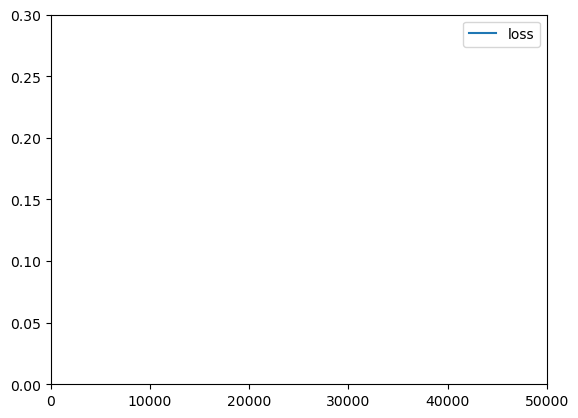

Epoch [200/1000], Loss: 0.0322


<Figure size 640x480 with 0 Axes>

Epoch [300/1000], Loss: 0.0354


<Figure size 640x480 with 0 Axes>

Epoch [400/1000], Loss: 0.0340


<Figure size 640x480 with 0 Axes>

Epoch [500/1000], Loss: 0.0319


<Figure size 640x480 with 0 Axes>

Epoch [600/1000], Loss: 0.0576


<Figure size 640x480 with 0 Axes>

Epoch [700/1000], Loss: 0.0323


<Figure size 640x480 with 0 Axes>

Epoch [800/1000], Loss: 0.0341


<Figure size 640x480 with 0 Axes>

Epoch [900/1000], Loss: 0.0867


<Figure size 640x480 with 0 Axes>

Epoch [1000/1000], Loss: 0.0334


<Figure size 640x480 with 0 Axes>

Final parameters:
fc1.weight: tensor([[-3.7922],
        [-1.3608],
        [-0.3275],
        [-3.7577],
        [ 0.3119],
        [-0.5288],
        [-1.4862],
        [-0.4901]])
fc1.bias: tensor([-0.7885, -0.1017,  4.3636,  0.0411, -6.7907,  2.4879, -0.1779,  3.7296])
fc2.weight: tensor([[-1.8646e-01,  3.7735e-02,  7.9473e-02,  2.8508e-01,  1.6075e-03,
          9.1076e-02,  2.6146e-01, -1.9495e-01],
        [ 2.2590e-01, -1.7215e-01,  6.9567e-01,  5.7573e-01, -2.1236e-01,
         -6.3216e-01,  1.6630e-01,  4.9036e-02],
        [-4.8772e-02,  1.2456e-01,  3.1456e-02,  4.4010e-02, -3.4730e-02,
         -1.9558e-01, -5.6577e-02, -2.0979e-01],
        [ 1.3476e+00,  7.1802e-01, -5.0605e-01,  1.0371e+00, -2.7509e-01,
         -1.5974e-01,  7.2805e-01, -8.8776e-02],
        [ 2.6375e+00,  9.0578e-01,  7.0560e-02,  2.7554e+00, -7.7741e-01,
          5.2878e-01,  9.3711e-01, -8.4006e-01],
        [-1.9160e+00, -6.2003e-01, -1.1184e+00, -2.0086e+00,  9.5024e-02,
         -4.9914e-01, -7.

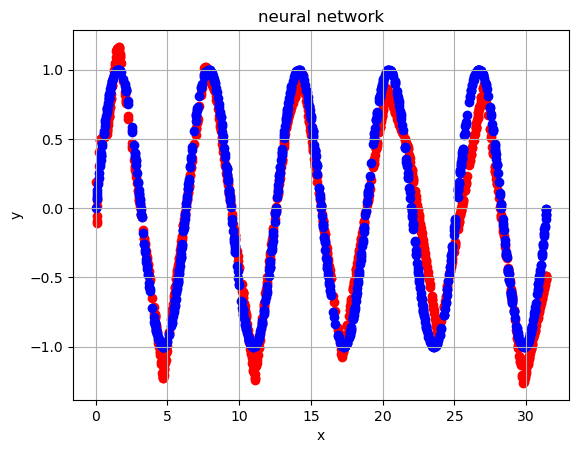

In [22]:

# 生成一些简单的数据
X = torch.tensor(data_x, dtype=torch.float32)
Y = torch.tensor(data_y, dtype=torch.float32)

epochs = []
losses = []
plt.ion()
fig, ax = plt.subplots()
ax.set_xlim(0,50000)
ax.set_ylim(0,0.3)

line, = ax.plot([],[],label="loss")

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X)
    loss = criterion(outputs, Y)
    
    # 反向传播
    optimizer.zero_grad()  # 清除之前的梯度
    loss.backward()       # 计算梯度
    optimizer.step()      # 更新权重

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        epochs.append(float(epoch))
        losses.append(float(f"{loss.item():.4f}"))

        line.set_data(epochs, losses)
        ax.set_xlim(0,50000)
        ax.set_ylim(0,0.3)
        ax.legend()
        plt.draw()
        plt.pause(0.1)

plt.ioff()
plt.show()

# 查看最终参数
print("Final parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# 测试模型
'''
with torch.no_grad():
    test_input = torch.tensor([[5.0]])
    prediction = model(test_input)
    print(f"Prediction for input 5.0: {prediction.item():.4f}")
'''


random_array = np.random.uniform(0, 10 * np.pi, size=(1000, 1))
random_tensor = torch.tensor(random_array, dtype=torch.float32)
prediction = model(random_tensor)
sin_values = torch.sin(random_tensor)

random_values_np = random_tensor.detach().numpy()
prediction_np = prediction.detach().numpy()
sin_values_np = sin_values.detach().numpy()

plt.scatter(random_values_np, prediction_np, label='prediction', color='red')
plt.scatter(random_values_np, sin_values_np, label='sin', color='blue',marker="o")
plt.title('neural network')
plt.xlabel('x')
plt.ylabel('y')

plt.grid(True)
plt.show()